# Assignment 2 - Dimensionality Reduction

By- Gargi Mishra

Enroll no. - 20/10/MT/017

In [1]:
#importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')
print(df.shape)
df.head()

(2938, 22)


,Country,Year,Status,Life_exp,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Preprocessing

In [3]:
#create numeric classs

df.loc[df['Status'] == 'Developing','Status']=0
df.loc[df['Status'] == 'Developed','Status']=1
df.head()

,Country,Year,Status,Life_exp,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_exp                            10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#filling missing values

df['Life_exp'] = df['Life_exp'].fillna(method ='pad')
df['Adult Mortality'] = df['Adult Mortality'].fillna(method ='pad')
df['Alcohol'] = df['Alcohol'].fillna(method ='pad')
df['Hepatitis B'] = df['Hepatitis B'].fillna(method ='pad')
df['BMI'] = df['BMI'].fillna(method ='pad')
df['Polio'] = df['Polio'].fillna(method ='pad')
df['Total expenditure'] = df['Total expenditure'].fillna(method ='pad')
df['Diphtheria'] = df['Diphtheria'].fillna(method ='pad')
df['GDP'] = df['GDP'].fillna(method ='pad')
df['Population'] = df['Population'].fillna(method ='pad')
df['thinness  1-19 years'] = df['thinness  1-19 years'].fillna(method ='pad')
df['thinness 5-9 years'] = df['thinness 5-9 years'].fillna(method ='pad')
df['Schooling'] = df['Schooling'].fillna(method ='pad')
df['Income composition of resources'] = df['Income composition of resources'].fillna(method ='pad')

In [6]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_exp                           0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
# split into training and testing sets
#X, y = df.iloc[:, 1:].values, df.iloc[:, 3].values
Xa = df.drop('Life_exp', axis=1)
X = Xa.drop('Country', axis=1)
y=df.Life_exp
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

(2938, 20)


In [8]:
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### 1. Dimensionality Reduction using PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### 2. Scatter plot

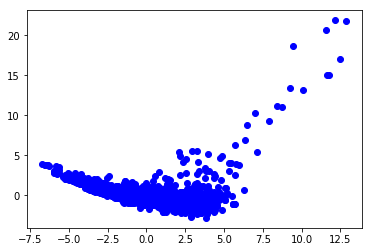

In [10]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c='b', label='Data points')
plt.show()

### 3. Cluster analysis

In [11]:
from sklearn.cluster import KMeans

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X_train_pca, 2)
kmeans = pd.DataFrame(clust_labels)

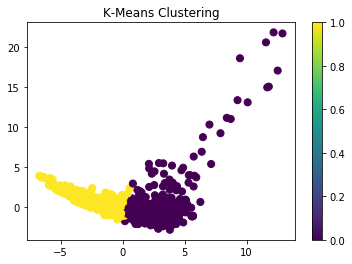

In [12]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train_pca[:,0],X_train_pca[:,1], c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
plt.colorbar(scatter)
plt.show()

### 4. Linear Regression Model

#### (a) Without dimensionality reduction

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(X_train_std, y_train)
y_pred=regr.predict(X_test_std)

print('intercept:', regr.intercept_)
print('slope:', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

intercept: 69.19056420233464
slope: [ -0.1104435    0.58446747  -2.28510207  12.60586019   0.25334909
   0.18623321  -0.06318619  -0.28773142   0.85558655 -12.80660105
   0.56512047   0.13865566   0.7634461   -2.45630693   0.45657077
   0.0440474   -0.44357938   0.26076718   1.21303627   2.49734931]
Mean squared error: 17.69
Coefficient of determination: 0.80


#### (b) With dimensionality reduction

In [14]:
regr = LinearRegression()
regr.fit(X_train_pca, y_train)
y_pred_pca=regr.predict(X_test_pca)

print('intercept:', regr.intercept_)
print('slope:', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_pca))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_pca))

intercept: 69.19056420233464
slope: [-3.10168086  1.57048848]
Mean squared error: 30.34
Coefficient of determination: 0.66
